In [2]:
import scipy as scp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cachetools import cached, TTLCache
import re
import csv
import dash_bio
from dash import dcc
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [3]:
df = pd.read_csv("../data/data_TPM.csv")

In [4]:
df

,CASE.NEUAA599TMX.5310.T,CASE.NEUAB000NKC.5726.T,CASE.NEUAF553MJ3.5884.T,CASE.NEUAG603XLK.5754.T,CASE.NEUAM655HF7.5543.T,CASE.NEUAT234RK6.6445.T,CASE.NEUAW157NMJ.5550.T,CASE.NEUAX665ZHY.6529.T,CASE.NEUBA169GXD.6024.T,CASE.NEUBC998WWB.5912.T,...,CTRL.NEUNN472ACB.7673.T,CTRL.NEUPL878MTL.6343.T,CTRL.NEUPW536ZKZ.6983.T,CTRL.NEURV546WMW.7158.T,CTRL.NEUWN092BVG.6688.T,CTRL.NEUXC258VTR.6762.T,CTRL.NEUXP955XW7.7431.T,CTRL.NEUXW311EFC.7053.T,CTRL.NEUZL045YD3.6557.T,gene_id
0,0.304700,0.692162,5.455758,0.246375,3.196071,1.586783,3.333881,1.064963,0.027728,0.755218,...,0.190031,0.828198,0.073522,0.056463,0.347307,0.718808,11.654467,0.866606,0.283515,TSPAN6
1,0.630214,0.014706,0.105857,0.000000,0.001485,0.000000,0.000000,0.010353,0.000000,0.000000,...,0.000000,0.000000,0.000532,0.000000,0.000000,0.000000,0.000000,0.004374,0.000000,TNMD
2,4.706074,1.661056,18.246464,1.442859,3.090959,16.221882,2.018900,1.204799,3.923521,0.592086,...,0.372813,0.130487,0.126477,0.270383,0.103954,1.422116,0.841119,1.742853,0.132552,DPM1
3,1.304496,0.610272,1.507563,2.448479,0.270518,0.823864,0.331819,0.482789,1.445171,0.392886,...,0.446264,0.723537,0.040097,0.039068,0.483226,17.056114,0.242932,0.531586,0.189553,SCYL3
4,0.194835,0.304679,0.075173,0.448828,0.303295,0.154764,0.644692,0.285319,0.239650,0.160804,...,0.016663,0.068752,0.032536,0.179261,0.253454,0.030143,0.021569,0.133043,0.172525,C1orf112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57937,0.000000,0.087441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AC104389.6
57938,0.000000,0.000000,0.000000,0.000000,0.041488,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AC010616.2
57939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AL034430.1
57940,0.019870,0.006122,1.330466,0.176416,0.548038,5.888097,0.292762,0.014811,0.014854,0.267154,...,0.010767,0.012079,0.001008,0.017871,0.012797,0.004433,0.004224,0.005554,0.036974,AP000646.1


In [5]:
df = df[df['gene_id'].notna()]

In [6]:
df

,CASE.NEUAA599TMX.5310.T,CASE.NEUAB000NKC.5726.T,CASE.NEUAF553MJ3.5884.T,CASE.NEUAG603XLK.5754.T,CASE.NEUAM655HF7.5543.T,CASE.NEUAT234RK6.6445.T,CASE.NEUAW157NMJ.5550.T,CASE.NEUAX665ZHY.6529.T,CASE.NEUBA169GXD.6024.T,CASE.NEUBC998WWB.5912.T,...,CTRL.NEUNN472ACB.7673.T,CTRL.NEUPL878MTL.6343.T,CTRL.NEUPW536ZKZ.6983.T,CTRL.NEURV546WMW.7158.T,CTRL.NEUWN092BVG.6688.T,CTRL.NEUXC258VTR.6762.T,CTRL.NEUXP955XW7.7431.T,CTRL.NEUXW311EFC.7053.T,CTRL.NEUZL045YD3.6557.T,gene_id
0,0.304700,0.692162,5.455758,0.246375,3.196071,1.586783,3.333881,1.064963,0.027728,0.755218,...,0.190031,0.828198,0.073522,0.056463,0.347307,0.718808,11.654467,0.866606,0.283515,TSPAN6
1,0.630214,0.014706,0.105857,0.000000,0.001485,0.000000,0.000000,0.010353,0.000000,0.000000,...,0.000000,0.000000,0.000532,0.000000,0.000000,0.000000,0.000000,0.004374,0.000000,TNMD
2,4.706074,1.661056,18.246464,1.442859,3.090959,16.221882,2.018900,1.204799,3.923521,0.592086,...,0.372813,0.130487,0.126477,0.270383,0.103954,1.422116,0.841119,1.742853,0.132552,DPM1
3,1.304496,0.610272,1.507563,2.448479,0.270518,0.823864,0.331819,0.482789,1.445171,0.392886,...,0.446264,0.723537,0.040097,0.039068,0.483226,17.056114,0.242932,0.531586,0.189553,SCYL3
4,0.194835,0.304679,0.075173,0.448828,0.303295,0.154764,0.644692,0.285319,0.239650,0.160804,...,0.016663,0.068752,0.032536,0.179261,0.253454,0.030143,0.021569,0.133043,0.172525,C1orf112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57937,0.000000,0.087441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AC104389.6
57938,0.000000,0.000000,0.000000,0.000000,0.041488,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AC010616.2
57939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AL034430.1
57940,0.019870,0.006122,1.330466,0.176416,0.548038,5.888097,0.292762,0.014811,0.014854,0.267154,...,0.010767,0.012079,0.001008,0.017871,0.012797,0.004433,0.004224,0.005554,0.036974,AP000646.1


In [9]:
col_list=df.columns.str.split('.').str[0]+"-"+df.columns.str.split('.').str[1]

In [10]:
col_list.values

array(['CASE-NEUAA599TMX', 'CASE-NEUAB000NKC', 'CASE-NEUAF553MJ3',
       'CASE-NEUAG603XLK', 'CASE-NEUAM655HF7', 'CASE-NEUAT234RK6',
       'CASE-NEUAW157NMJ', 'CASE-NEUAX665ZHY', 'CASE-NEUBA169GXD',
       'CASE-NEUBC998WWB', 'CASE-NEUBD218YR3', 'CASE-NEUBD288RXQ',
       'CASE-NEUBK117YXL', 'CASE-NEUBY734PFR', 'CASE-NEUCB613CA9',
       'CASE-NEUCE965ZGK', 'CASE-NEUCF538BRM', 'CASE-NEUCN596RR3',
       'CASE-NEUCU245GBQ', 'CASE-NEUDD018KAH', 'CASE-NEUDE902GCT',
       'CASE-NEUDG000ZG5', 'CASE-NEUDG272XWC', 'CASE-NEUDP155HFH',
       'CASE-NEUDT709YHN', 'CASE-NEUEB422WW0', 'CASE-NEUEK191WYC',
       'CASE-NEUEM720BUU', 'CASE-NEUEN017PCJ', 'CASE-NEUEN476CLW',
       'CASE-NEUEU558MNK', 'CASE-NEUFB989DT1', 'CASE-NEUFH122WN7',
       'CASE-NEUFV237VCZ', 'CASE-NEUFY342UNG', 'CASE-NEUGD965XVD',
       'CASE-NEUGE540TC4', 'CASE-NEUGJ081HKR', 'CASE-NEUGP781PDU',
       'CASE-NEUGR121TFD', 'CASE-NEUGW326BRV', 'CASE-NEUGW340YEB',
       'CASE-NEUHB491NGF', 'CASE-NEUHG644RYB', 'CASE-NEUHG791R

In [11]:
col_dict=pd.Series(col_list.values,index=df.columns).to_dict()

In [12]:
df.rename(columns=col_dict,inplace=True)

In [26]:
df.columns = [*df.columns[:-1], 'gene_id']

In [27]:
df

,CASE-NEUAA599TMX,CASE-NEUAB000NKC,CASE-NEUAF553MJ3,CASE-NEUAG603XLK,CASE-NEUAM655HF7,CASE-NEUAT234RK6,CASE-NEUAW157NMJ,CASE-NEUAX665ZHY,CASE-NEUBA169GXD,CASE-NEUBC998WWB,...,CTRL-NEUNN472ACB,CTRL-NEUPL878MTL,CTRL-NEUPW536ZKZ,CTRL-NEURV546WMW,CTRL-NEUWN092BVG,CTRL-NEUXC258VTR,CTRL-NEUXP955XW7,CTRL-NEUXW311EFC,CTRL-NEUZL045YD3,gene_id
0,0.304700,0.692162,5.455758,0.246375,3.196071,1.586783,3.333881,1.064963,0.027728,0.755218,...,0.190031,0.828198,0.073522,0.056463,0.347307,0.718808,11.654467,0.866606,0.283515,TSPAN6
1,0.630214,0.014706,0.105857,0.000000,0.001485,0.000000,0.000000,0.010353,0.000000,0.000000,...,0.000000,0.000000,0.000532,0.000000,0.000000,0.000000,0.000000,0.004374,0.000000,TNMD
2,4.706074,1.661056,18.246464,1.442859,3.090959,16.221882,2.018900,1.204799,3.923521,0.592086,...,0.372813,0.130487,0.126477,0.270383,0.103954,1.422116,0.841119,1.742853,0.132552,DPM1
3,1.304496,0.610272,1.507563,2.448479,0.270518,0.823864,0.331819,0.482789,1.445171,0.392886,...,0.446264,0.723537,0.040097,0.039068,0.483226,17.056114,0.242932,0.531586,0.189553,SCYL3
4,0.194835,0.304679,0.075173,0.448828,0.303295,0.154764,0.644692,0.285319,0.239650,0.160804,...,0.016663,0.068752,0.032536,0.179261,0.253454,0.030143,0.021569,0.133043,0.172525,C1orf112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57937,0.000000,0.087441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AC104389.6
57938,0.000000,0.000000,0.000000,0.000000,0.041488,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AC010616.2
57939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AL034430.1
57940,0.019870,0.006122,1.330466,0.176416,0.548038,5.888097,0.292762,0.014811,0.014854,0.267154,...,0.010767,0.012079,0.001008,0.017871,0.012797,0.004433,0.004224,0.005554,0.036974,AP000646.1


In [28]:
df.to_csv('../data/data.csv', index=False)

In [2]:
df=pd.read_csv("../data/data.csv")

In [3]:
#load user input of gene list 
gene_list = open("../data/geneset.txt").read().splitlines()
gene_list

['ALS2',
 'APAF1',
 'BAD',
 'BAX',
 'BCL2',
 'BCL2L1',
 'BID',
 'CASP1',
 'CASP3',
 'CASP9',
 'CAT',
 'CCS',
 'CHP1',
 'CHP2',
 'CYCS',
 'DAXX',
 'DERL1',
 'GPX1',
 'GRIA1',
 'GRIA2',
 'GRIN1',
 'GRIN2A',
 'GRIN2B',
 'GRIN2C',
 'GRIN2D',
 'MAP2K3',
 'MAP2K6',
 'MAP3K5',
 'MAPK11',
 'MAPK12',
 'MAPK13',
 'MAPK14',
 'NEFH',
 'NEFL',
 'NEFM',
 'NOS1',
 'PPP3CA',
 'PPP3CB',
 'PPP3CC',
 'PPP3R1',
 'PPP3R2',
 'PRPH',
 'PRPH2',
 'RAB5A',
 'RAC1',
 'SLC1A2',
 'SOD1',
 'TNF',
 'TNFRSF1A',
 'TNFRSF1B',
 'TOMM40',
 'TOMM40L',
 'TP53']

In [14]:
# select genes from database from inputted gene list 
df_selected=df[df['gene_id'].isin(gene_list)]
from scipy.cluster.hierarchy import dendrogram, linkage
df_selected = df_selected.set_index('gene_id')
#df_selected=df_selected.astype('float16')
df_selected.info()
#Log Scale the selected data
#df_selected = (1+df_selected)/2 # (-1,1] -> (0,1]
#df_selected=np.log(df_selected)

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, BAD to NEFL
Columns: 290 entries, CASE-NEUAA599TMX to CTRL-NEUZL045YD3
dtypes: int64(290)
memory usage: 120.5+ KB


In [9]:
help(dash_bio.Clustergram)

Help on function Clustergram in module dash_bio.component_factory._clustergram:

Clustergram(data, generate_curves_dict=False, return_computed_traces=False, computed_traces=None, row_labels=None, row_colors=None, row_colors_label=None, column_labels=None, column_colors=None, column_colors_label=None, hidden_labels=None, standardize='none', cluster='all', row_dist='euclidean', col_dist='euclidean', dist_fun=<function pdist at 0x7f2ff0800790>, link_fun=None, link_method=None, color_threshold=None, optimal_leaf_order=False, color_map=None, color_list=None, display_range=3, center_values=True, log_transform=False, display_ratio=0.2, imputer_parameters=None, row_group_marker=None, col_group_marker=None, tick_font=None, annotation_font=None, line_width=0.5, paper_bg_color='rgba(0,0,0,0)', plot_bg_color='rgba(0,0,0,0)', height=500, width=500)
    Return a Dash Bio Clustergram object.
    
    Keyword arguments:
    
    - data (2D array-like; required): Matrix or table of observations (droppi

In [21]:
col_colors

Index(['r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b',
       ...
       'b', 'b', 'r', 'b', 'r', 'r', 'r', 'r', 'r', 'r'],
      dtype='object', length=290)

In [39]:
fig=dash_bio.Clustergram(
    data=df_selected,
    column_labels=list(df_selected.columns.values),
    row_labels=list(df_selected.index),
    height=1000,
    width=5000,
    color_map="agsunset",
    line_width=1,
    link_fun=linkage(df_selected,"complete")
)

TypeError: 'numpy.ndarray' object is not callable

In [29]:
fig

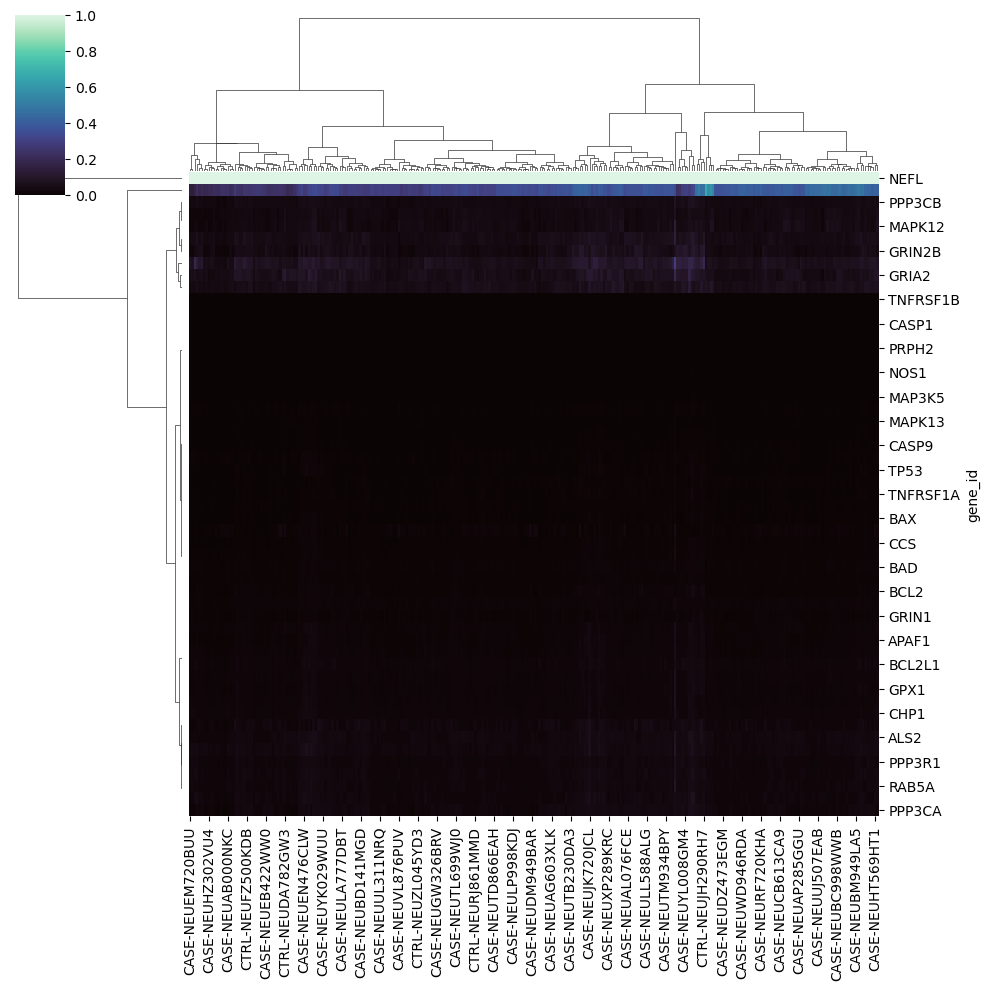

In [20]:
sns.clustermap(df_selected, metric="euclidean", standard_scale=1, method="ward",cmap="mako")
plt.show()

In [15]:
covariates=pd.read_csv("../data/covariates.csv")

In [144]:
covariates["Ethnicity"]

0      Not Hispanic or Latino
1      Not Hispanic or Latino
2      Not Hispanic or Latino
3      Not Hispanic or Latino
4      Not Hispanic or Latino
                ...          
285    Not Hispanic or Latino
286    Not Hispanic or Latino
287    Not Hispanic or Latino
288    Not Hispanic or Latino
289    Not Hispanic or Latino
Name: Ethnicity, Length: 290, dtype: object

In [100]:
sex_dict

{'CASE-NEUDE902GCT': 'Female',
 'CTRL-NEUAA485DZL': 'Male',
 'CASE-NEUAA599TMX': 'Female',
 'CASE-NEUAB000NKC': 'Female',
 'CASE-NEUAE228FF6': 'Male',
 'CASE-NEUAE993EPR': 'Female',
 'CASE-NEUAF553MJ3': 'Female',
 'CASE-NEUAG241NUD': 'Male',
 'CASE-NEUAG603XLK': 'Female',
 'CASE-NEUAG766ULB': 'Male',
 'CTRL-NEUAJ025JC3': 'Female',
 'CTRL-NEUAJ928PAA': 'Female',
 'CASE-NEUAL076FCE': 'Male',
 'CASE-NEUAM655HF7': 'Female',
 'CASE-NEUAP285GGU': 'Female',
 'CASE-NEUAT234RK6': 'Male',
 'CASE-NEUAW157NMJ': 'Male',
 'CASE-NEUAW717TN6': 'Male',
 'CASE-NEUAX665ZHY': 'Male',
 'CASE-NEUAY067UTB': 'Female',
 'CASE-NEUAZ394JEZ': 'Male',
 'CASE-NEUBA169GXD': 'Male',
 'CASE-NEUBC901KL3': 'Female',
 'CASE-NEUBC998WWB': 'Male',
 'CASE-NEUBD141MGD': 'Female',
 'CASE-NEUBD218YR3': 'Male',
 'CASE-NEUBD288RXQ': 'Male',
 'CASE-NEUBK117YXL': 'Male',
 'CASE-NEUBM949LA5': 'Male',
 'CASE-NEUBN979ZZ5': 'Male',
 'CASE-NEUBT273FH3': 'Female',
 'CASE-NEUBW008RJ5': 'Female',
 'CASE-NEUBY734PFR': 'Female',
 'CTRL-NEUC

In [150]:
covariates["Subject Group"].values

array(['ALS', 'Healthy Control', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS',
       'ALS', 'ALS', 'Healthy Control', 'Healthy Control', 'ALS', 'ALS',
       'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS',
       'ALS', 'Asymptomatic ALS Gene carrier', 'ALS', 'ALS', 'ALS', 'ALS',
       'ALS', 'ALS', 'ALS', 'ALS', 'Healthy Control', 'ALS', 'ALS', 'ALS',
       'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS',
       'Healthy Control', 'ALS', 'Healthy Control', 'Healthy Control',
       'ALS', 'Healthy Control', 'ALS', 'ALS', 'ALS', 'Healthy Control',
       'ALS', 'ALS', 'ALS', 'Healthy Control', 'ALS', 'ALS',
       'Healthy Control', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS',
       'ALS', 'ALS', 'Healthy Control', 'ALS', 'ALS', 'Healthy Control',
       'ALS', 'Healthy Control', 'ALS', 'ALS', 'Healthy Control', 'ALS',
       'ALS', 'ALS', 'ALS', 'Healthy Control', 'Healthy Control', 'ALS',
       'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS', 'ALS',


In [19]:
#Sex covariate
sex_dict=pd.Series(covariates.Sex.values,index=covariates["Participant_ID"]).to_dict()
df_selected.rename(columns=sex_dict,inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rb"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [143]:
#Race covariate
race_dict=pd.Series(covariates.Race.values,index=covariates["Participant_ID"]).to_dict()
df_selected.rename(columns=race_dict, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rbgcmykw"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [148]:
#ethnicity covariate
ethnicity_dict=pd.Series(covariates.Ethnicity.values,index=covariates["Participant_ID"]).to_dict()
df_selected.rename(columns=ethnicity_dict, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rb"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [158]:
#subject_group covariate
subject_group_dict=pd.Series(covariates["Subject Group"].values,index=covariates["Participant_ID"]).to_dict()
df_selected.rename(columns=subject_group_dict, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rbgc"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [163]:
#site_of_onset covariate
site_of_onset_dict=pd.Series(covariates["Site of Onset"].values,index=covariates["Participant_ID"]).to_dict()
df_selected.rename(columns=site_of_onset_dict, inplace=True)
df_selected = df_selected.loc[:, df_selected.columns.notnull()]
lut = dict(zip(df_selected.columns[0:len(df_selected.columns)].unique(), "rbgcm"))
col_colors = df_selected.columns[0:len(df_selected.columns)].map(lut)

In [160]:
covariates["Site of Onset"].value_counts()

Limb        158
Bulbar       51
Multiple     29
Axial         3
Other         3
Name: Site of Onset, dtype: int64

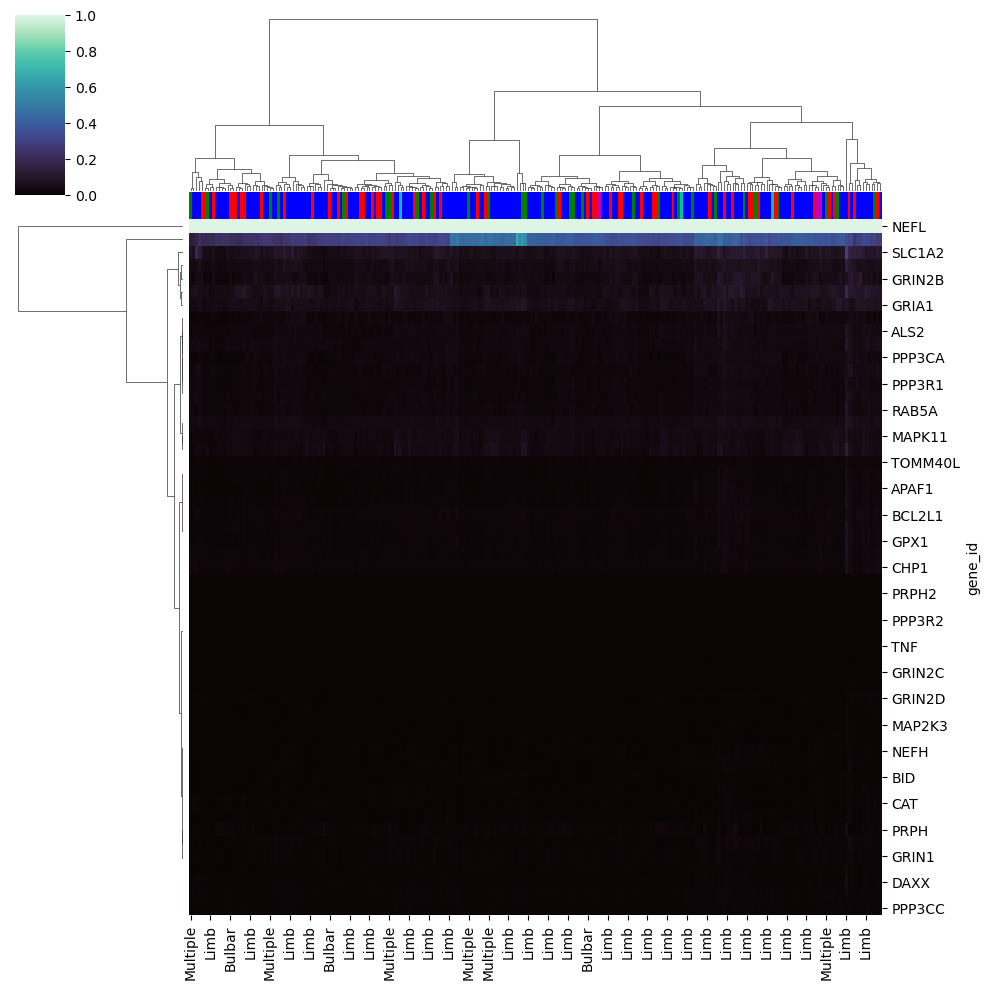

In [164]:
sns.clustermap(df_selected, metric="euclidean", standard_scale=1, method="ward",cmap="mako",col_colors=col_colors)
plt.show()